## Ссылки
1. [Напряжённость гравитационного поля (Вики)](https://ru.wikipedia.org/wiki/Напряжённость_гравитационного_поля)

# 18. Гравитационное поле Земли
Вычислить и построить графики зависимости напряженности гравитационного поля Земли от радиус-вектора (начало в центре Земли). Визуализировать векторное поле.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
G = 6.67428e-11    # G - Гравитационная постоянная
M = 5.9742e+24     # M - Масса земли, Кг
R_Earth = 6371000  # R_Earth - Радиус земли, м

In [4]:
# Напряжённость на расстоянии R
def E(R):
    global G, M
    return G * M / R**2

In [5]:
# Check that g=9.8
E(R_Earth)

9.823561527927778

In [6]:
y = []
x = []
step = 10000 # Meters
r = 1
while r <= R_Earth:
    y.append(E(r))
    x.append(r)
    r = r + step

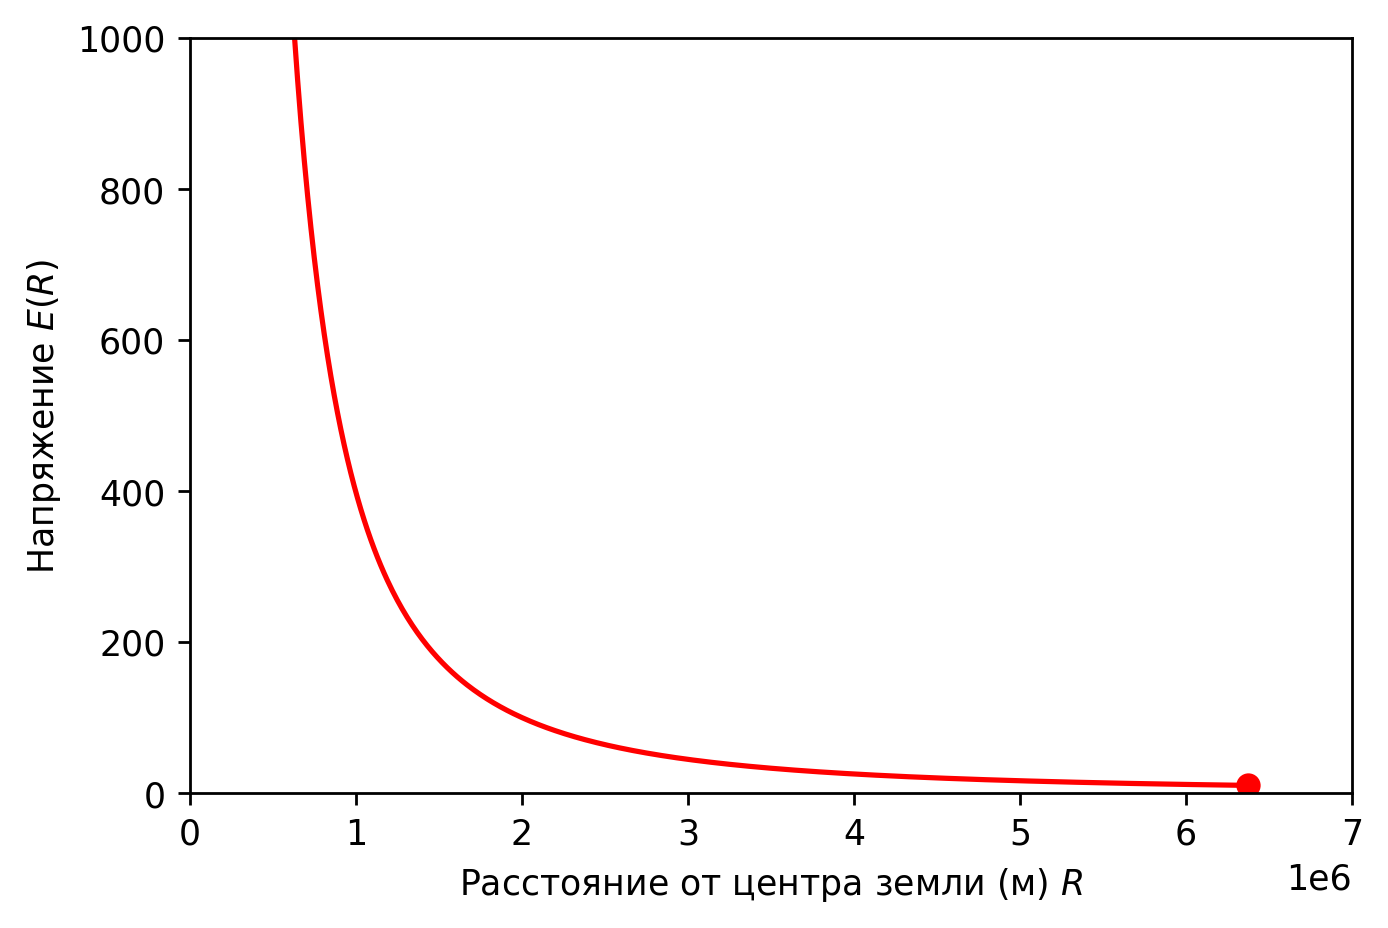

In [7]:

plt.figure(dpi=250)
plt.yscale("linear")
plt.xlabel('Расстояние от центра земли (м) $R$')
plt.ylim(0,1e+3)
plt.xlim(0,7e+6)
plt.plot(x, y, color="r")
plt.scatter(R_Earth, E(R_Earth), color="r")
plt.ylabel('Напряжение $E(R)$')
plt.show()

## Векторное поле

In [8]:
def vec(x0: float, y0: float, r: float) -> tuple:
    k = r / E(r)
    ### TODO
    return ((x0+1)/10, (y0+1)/10)

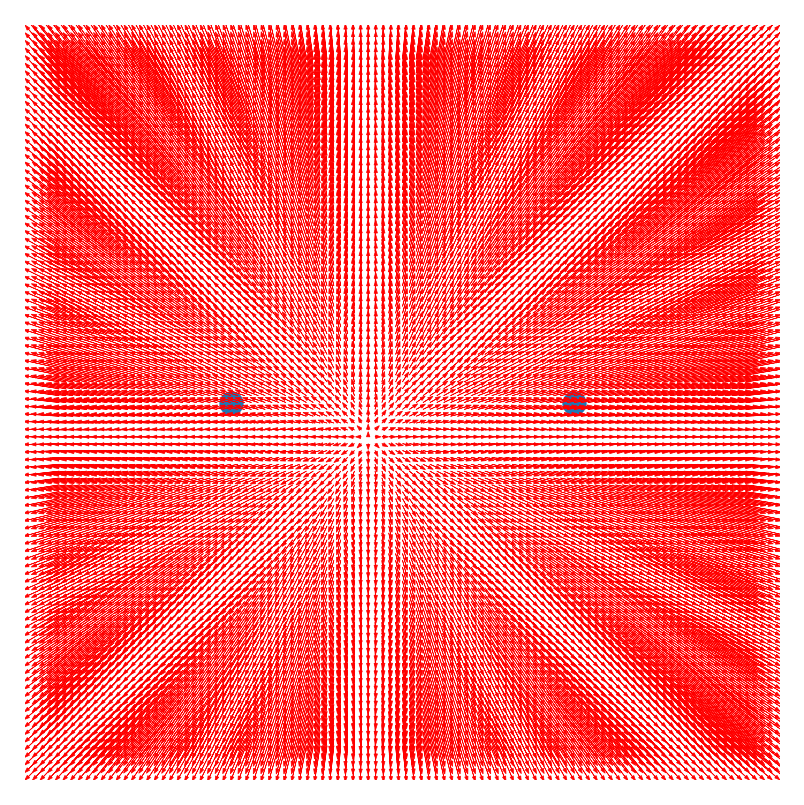

In [9]:

r = 6000
size = 10
qual = 0.2

# Initial setup
plt.figure(dpi=250)
plt.xlim(-(size+1), (size+1))
plt.ylim(-(size+1), (size+1))

grid = np.mgrid[-size:(size+qual):qual, -size:(size+qual):qual]
gx, gy = np.array(grid[0]).reshape(-1), np.array(grid[1]).reshape(-1)

for x,y in zip(gx, gy):
    x1,y1 = vec(x,y,r)
    plt.arrow(x,y,x1,y1, color="r", head_width=0.1, linewidth=0.2)
    

plt.scatter([-5,5],[0,0])
plt.gca().set_aspect('equal', adjustable='box')
plt.axis("off")
plt.show()

## Heatmap

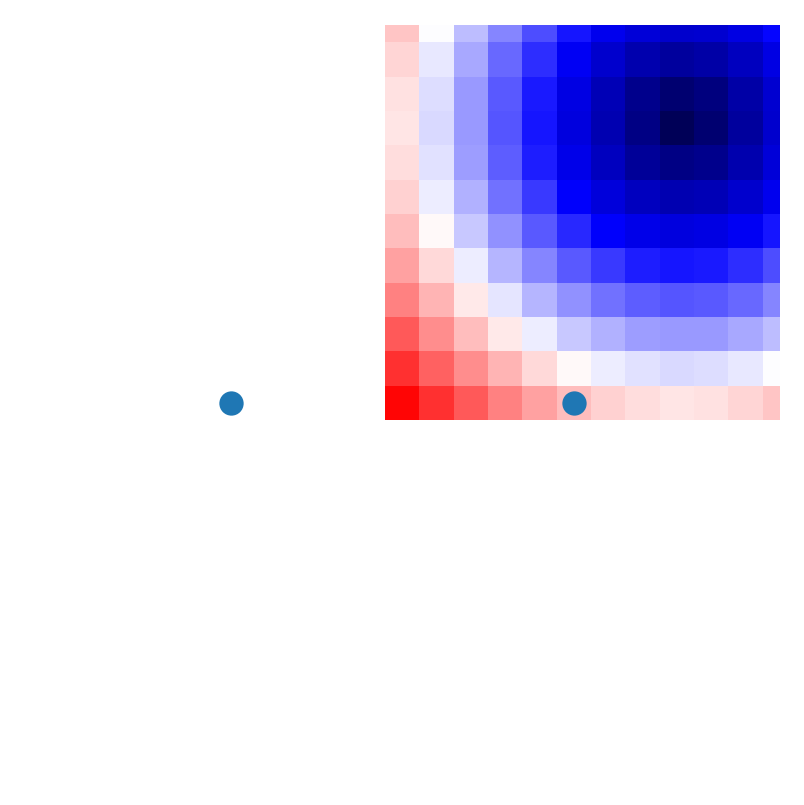

In [18]:
hmap = np.zeros((int(size*2//qual),int(size*2//qual)))
for x,y in zip(gx, gy):
    ex, ey = vec(x,y,r)
    hmap[int(x+size)][int(y+size)] = np.sqrt(ex**2 + ey**2)
plt.figure(dpi=250)
plt.xlim(-(size+1), (size+1))
plt.ylim(-(size+1), (size+1))
plt.imshow(hmap, cmap="seismic")
plt.scatter([-5,5],[0,0])
plt.gca().set_aspect('equal', adjustable='box')
plt.axis("off")
plt.show()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])